<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  3.6<br/>
<b>Networkx version:</b>  2.x<br/>
<b>Last update:</b> 15/02/2018
</span>

<a id='top'></a>
# *Intro to Networkx*

``Networkx`` is a python library designed to provide support for complex network modeling and analysis.

In this notebook are introduced some basilar features of the library.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started.

In [1]:
%matplotlib inline 
import networkx as nx
import matplotlib.pyplot as plt

### Graph construction, modification and visualisation

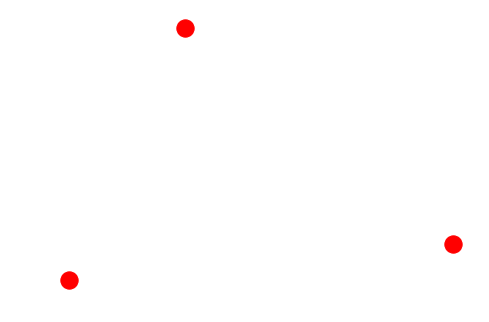

In [2]:
G = nx.Graph()

G.add_node('A');
G.add_node('B');
G.add_node('C');

nx.draw(G)
plt.show()

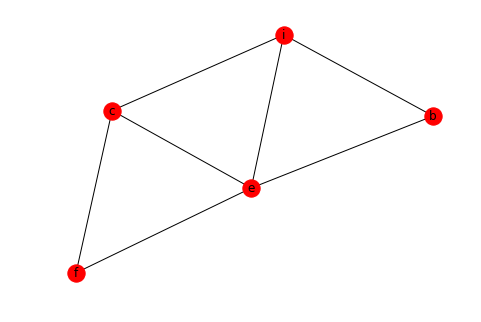

In [3]:
g = nx.Graph()
g.add_edge("e", "b")
g.add_edge("e", "i")
g.add_edge("b", "i")
g.add_edge("e", "c")
g.add_edge("c", "i")
g.add_edge("e", "f")
g.add_edge("f", "c")

nx.draw(g ,with_labels=True)
plt.show()

### Read Network from file

In [4]:
g = nx.read_edgelist("data/genre_net.csv", delimiter=",")

### Playing with subgraphs and components

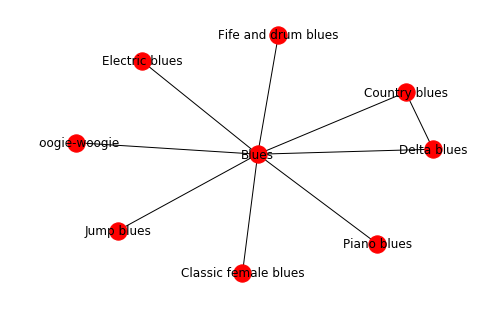

In [5]:
pop = nx.ego_graph(g, 'Blues')
nx.draw(pop, with_labels=True)
plt.show()

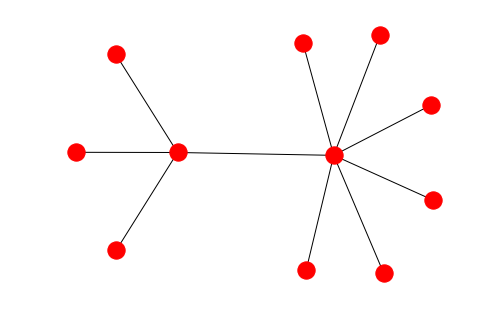

number of nodes: 11
average shrtest path: 2.1454545454545455


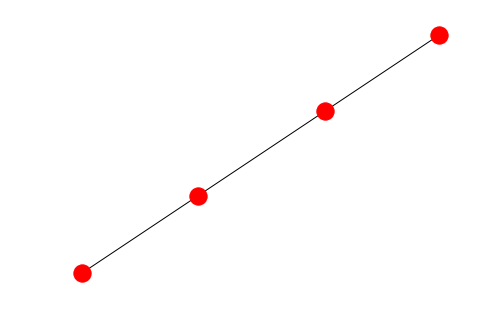

number of nodes: 4
average shrtest path: 1.6666666666666667


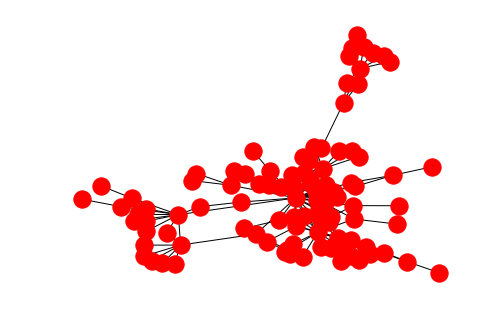

number of nodes: 98
average shrtest path: 3.6427519461392803


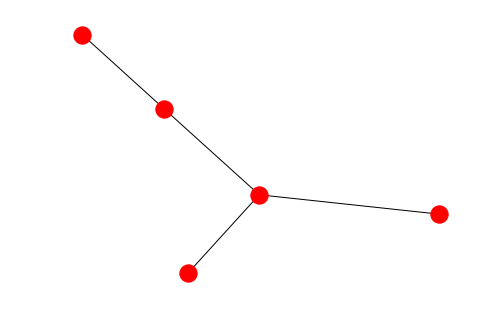

number of nodes: 5
average shrtest path: 1.8


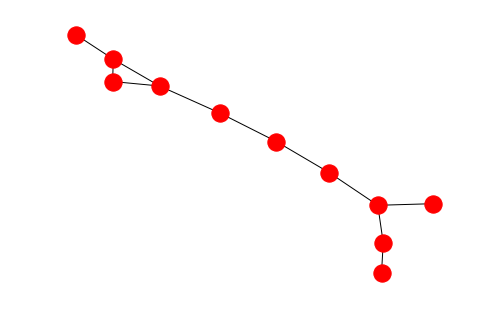

number of nodes: 11
average shrtest path: 3.4545454545454546


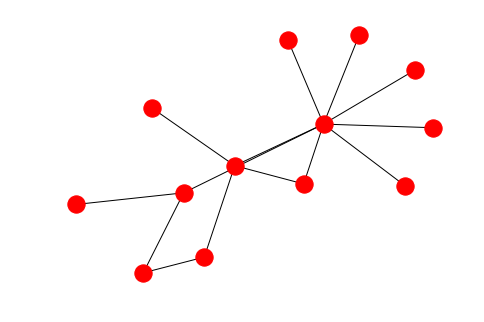

number of nodes: 13
average shrtest path: 2.1794871794871793


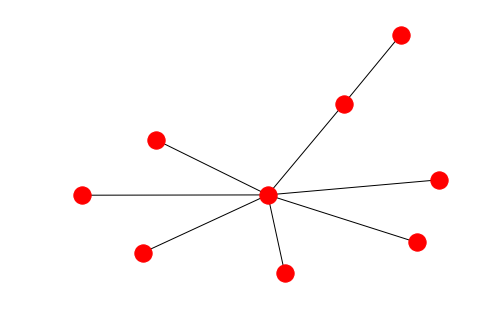

number of nodes: 9
average shrtest path: 1.9444444444444444


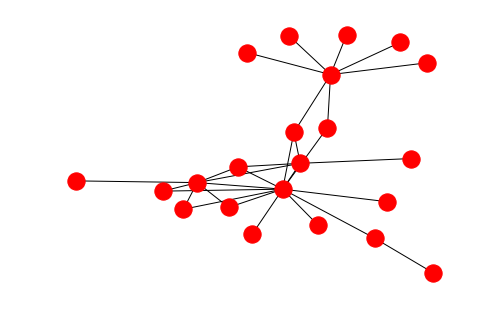

number of nodes: 22
average shrtest path: 2.670995670995671


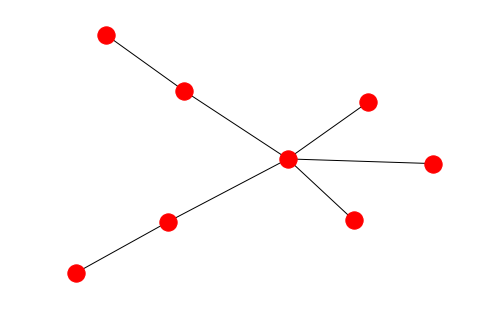

number of nodes: 8
average shrtest path: 2.107142857142857


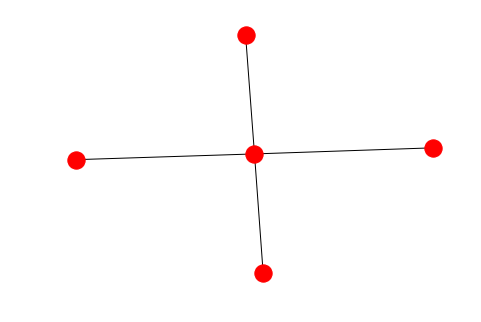

number of nodes: 5
average shrtest path: 1.6


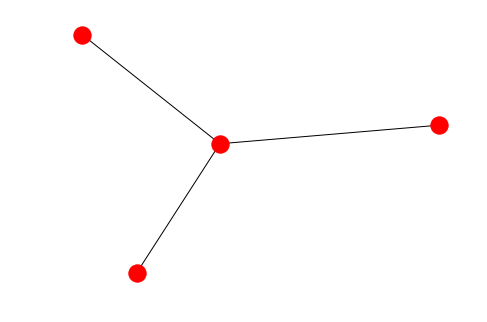

number of nodes: 4
average shrtest path: 1.5


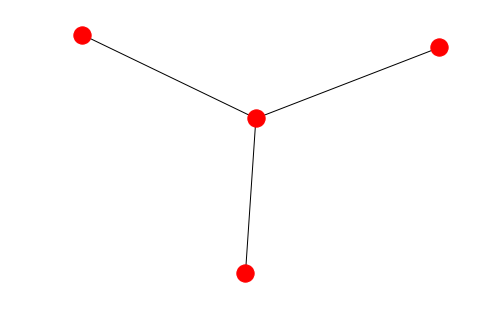

number of nodes: 4
average shrtest path: 1.5


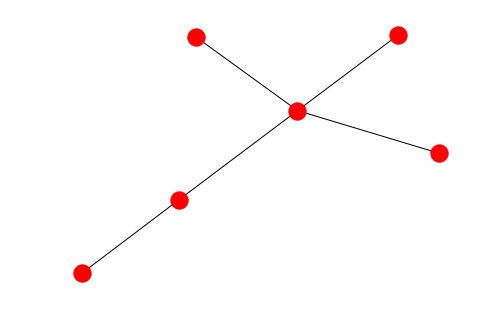

number of nodes: 6
average shrtest path: 1.8666666666666667


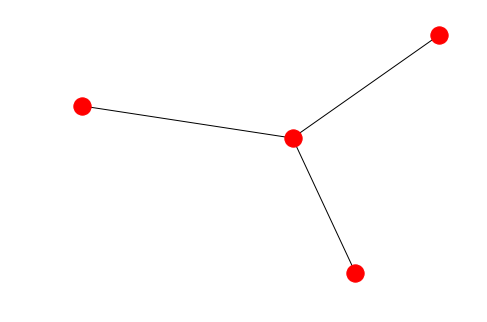

number of nodes: 4
average shrtest path: 1.5


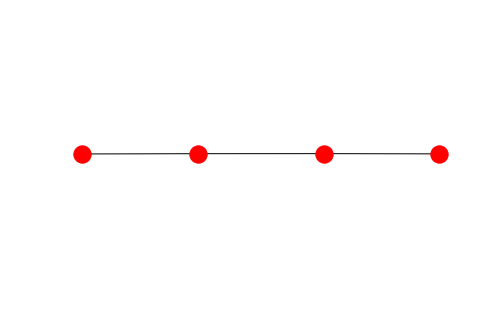

number of nodes: 4
average shrtest path: 1.6666666666666667


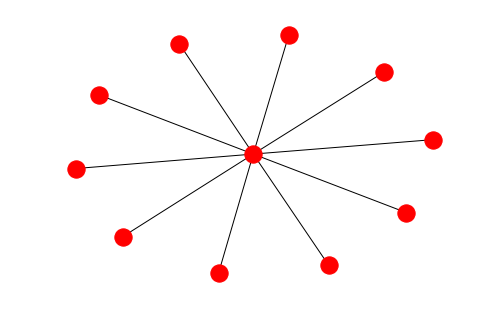

number of nodes: 11
average shrtest path: 1.8181818181818181


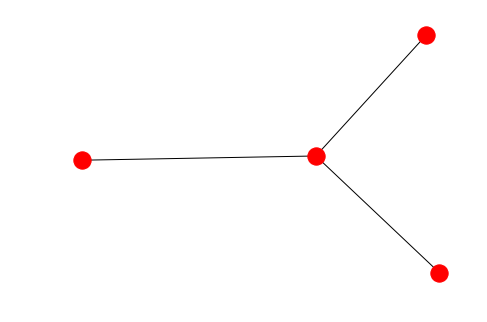

number of nodes: 4
average shrtest path: 1.5


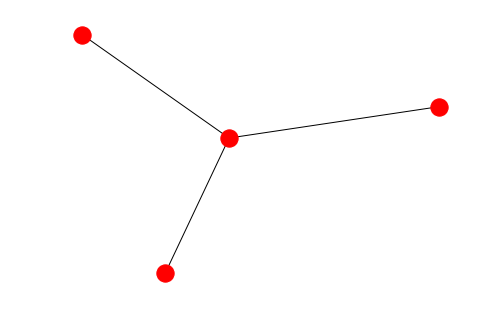

number of nodes: 4
average shrtest path: 1.5


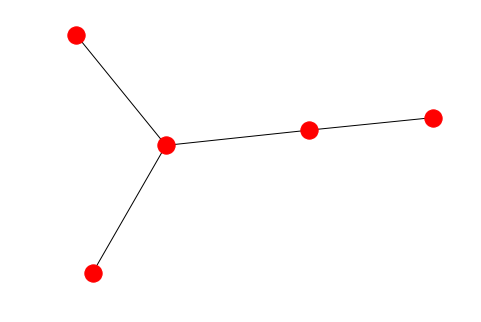

number of nodes: 5
average shrtest path: 1.8


In [6]:
cc = nx.connected_components(g)
    
i = 0
for c in cc:
    # extract the subgraph identifying the actual component
    sub = g.subgraph(c)
        
    # plot only components having at least 3 nodes
    if len(sub) > 3:
        nx.draw(sub)
        plt.show()
        print("number of nodes:", len(sub.nodes()))
        print("average shrtest path:", nx.average_shortest_path_length(sub))

### Degree Distributions

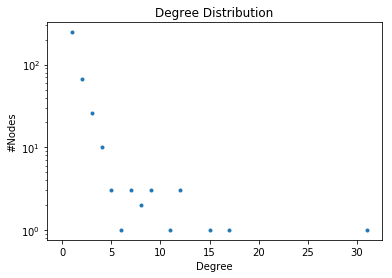

In [7]:
def degree_distribution(g):
    # get the degree histogram
    hist = nx.degree_histogram(g)
    
    plt.plot(range(0, len(hist)), hist, ".")
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("#Nodes")
    plt.semilogy()
    #plt.loglog()
    plt.show()

degree_distribution(g)

In [8]:
def compute_and_visualize_shortest_path(g, start, end):
    # compute the shortest paths among two nodes
    path = nx.shortest_path(g, start, end)
    print(path)
    
    # visualize the graph induced by the shortest path
    sub = g.subgraph(path)
    nx.draw(sub, with_labels=True)
    plt.show()

['Rock music', 'Indie rock', 'Dance-punk', 'No wave', 'Punk jazz']


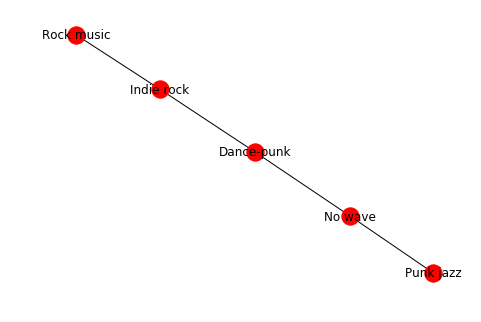

In [9]:
compute_and_visualize_shortest_path(g, 'Rock music', 'Punk jazz')

### Network generators

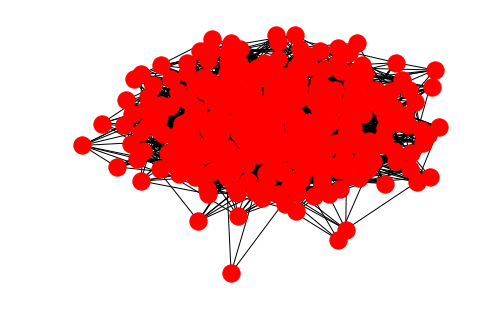

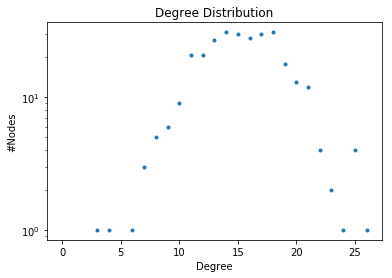

In [10]:
# network generators 1 (random graphs)
er = nx.erdos_renyi_graph(300, 0.05)
nx.draw(er)
plt.show()

degree_distribution(er)

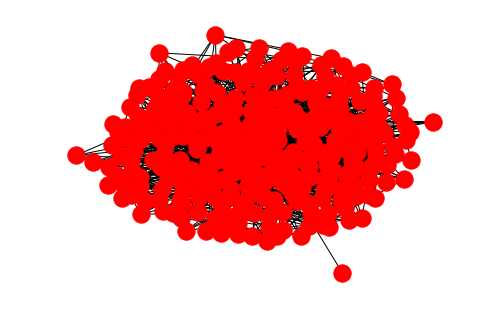

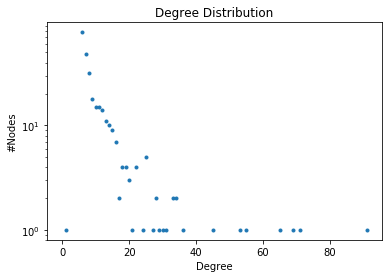

In [11]:
# network generators 2 (preferential attachment)
ba = nx.barabasi_albert_graph(300, 6)
nx.draw(ba)
plt.show()

degree_distribution(ba)